In [1]:
pip install tensorflow


In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Desktop/data/train'
valid_path = 'Desktop/data/test'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
mobilnet.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [10]:
# useful for getting number of output classes
folders = glob('Desktop/data/train/*')

In [11]:
folders

['Desktop/data/train\\Parasite', 'Desktop/data/train\\Uninfected']

In [12]:

# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [14]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
from tensorflow.keras.layers import MaxPooling2D


In [16]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [17]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [18]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Desktop/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [21]:
training_set

In [23]:
test_set = test_datagen.flow_from_directory('Desktop/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [26]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Acer\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
13/13 [==============================] - 36s 3s/step - loss: 1.9089 - accuracy: 0.5312 - val_loss: 1.3967 - val_accuracy: 0.3433
Epoch 2/50
13/13 [==============================] - 31s 2s/step - loss: 0.5774 - accuracy: 0.6875 - val_loss: 0.9422 - val_accuracy: 0.3657
Epoch 3/50
13/13 [==============================] - 24s 2s/step - loss: 0.5456 - accuracy: 0.6995 - val_loss: 1.0013 - val_accuracy: 0.3657
Epoch 4/50
13/13 [==============================] - 22s 2s/step - loss: 0.5434 - accuracy: 0.7139 - val_loss: 0.9010 - val_accuracy: 0.3507
Epoch 5/50
13/13 [==============================] - 23s 2s/step - loss: 0.4963 - accuracy: 0.7476 - val_loss: 0.9315 - val_accuracy: 0.3582
Epoch 6/50
13/13 [==============================] - 28s 2s/step - loss: 0.4212 - accuracy: 0.8053 - val_loss: 0.9622 - val_accuracy: 0.4030
Epoch 7/50
13/13 [==============================] - 23s 2s/step - loss: 0.4018 - accuracy: 0.8221 - val_loss: 0.8519 - val_accuracy: 0.3881
Epoch 8/50
13/13 [==

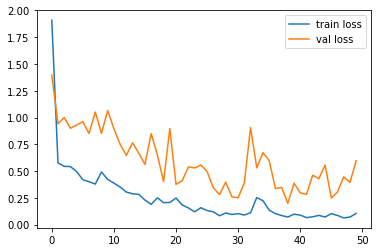

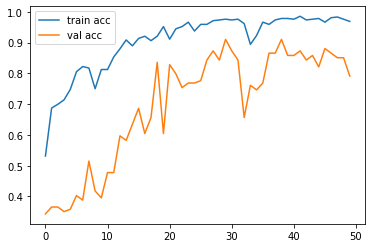

<Figure size 432x288 with 0 Axes>

In [27]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [28]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [29]:
y_pred = model.predict(test_set)

In [30]:
y_pred

array([[9.99025941e-01, 9.74109338e-04],
       [8.68373871e-01, 1.31626099e-01],
       [9.99279678e-01, 7.20319280e-04],
       [1.00000000e+00, 9.82020687e-09],
       [1.64404474e-02, 9.83559549e-01],
       [1.40803978e-02, 9.85919595e-01],
       [9.99947667e-01, 5.22971350e-05],
       [9.99999881e-01, 1.07374220e-07],
       [6.50297180e-02, 9.34970319e-01],
       [6.37169331e-02, 9.36283112e-01],
       [9.97898221e-01, 2.10171309e-03],
       [8.81026208e-01, 1.18973821e-01],
       [5.20992279e-01, 4.79007691e-01],
       [1.09895490e-01, 8.90104473e-01],
       [1.00000000e+00, 1.52242628e-11],
       [9.87175666e-03, 9.90128219e-01],
       [9.99999881e-01, 7.05255374e-08],
       [9.99491215e-01, 5.08782978e-04],
       [9.99999881e-01, 8.02687907e-08],
       [6.08298481e-01, 3.91701549e-01],
       [1.02818310e-02, 9.89718199e-01],
       [4.24302705e-02, 9.57569778e-01],
       [3.50719243e-02, 9.64928091e-01],
       [1.14288125e-02, 9.88571227e-01],
       [9.999986

In [31]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [32]:
y_pred


array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [34]:
model=load_model('model_vgg19.h5')


In [44]:
img=image.load_img('Desktop/data/test/Uninfected/2.png',target_size=(224,224))


In [45]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [46]:
x.shape

(224, 224, 3)

In [47]:
x=x/255

In [48]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [49]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [50]:
a=np.argmax(model.predict(img_data), axis=1)

In [51]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected


In [52]:
img=image.load_img('Desktop/data/test/Parasite/C39P4thinF_original_IMG_20150622_105803_cell_93.png',target_size=(224,224))

In [53]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [54]:
x.shape

(224, 224, 3)

In [55]:
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [56]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)